<a href="https://colab.research.google.com/github/Nichika0617/BasicSeminar/blob/main/basicseminar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.2 パーセプトロンの学習アルゴリズムをPythonで実装する**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [ ]:
class Perceptron(object):
  """
  パーセプトロンの分類器

  パラメータ
  -----------------
  eta : float
          学習率 (0.0より大きく1.0以下の値)
  n_iter : int
          訓練データの訓練回数
          エポック数とも言います(確か)
  random_state : int
          重みを初期化するための乱数シード
  属性
  ------------------
  w_ : 1次元配列
          適合後の重み
  errors :  リスト
          各エポックでの誤分類
  """
  def __init__(self, eta = 0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, Y):
    """訓練データに適合させる
    パラメータ
    --------------
    X : {配列のようなデータ構造}, shape = [n_examples, n_features]
          訓練データ
          n_examplesは訓練データの個数,n_featuresは特徴量の個数
    Y : 配列のようなデータ構造, shape = [n_examples]
          目的変数
    戻り値
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter): #訓練回数分まで訓練データを反復
      errors = 0
      for xi, target in zip(X, Y): #各訓練データで重みを更新
        # 重み w1,・・・wmの更新
        #P21 Δwj ....(2.1.5)
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        #重みの更新が0でない場合は誤分類としてカウント
        errors += int(update != 0.0)
      #反復ごとの誤差を格納
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    #総入力関数
    return np.dot(X, self.w_[1:]) + self.w_[0]
    
  def predict(self, X):
    #予測するための関数
    #1ステップ後のクラスラベルを返す
    return np.where(self.net_input(X) >= 0.0, 1, -1)

**2.3 Irisデータセットでのパーセプトロンモデルの訓練**

In [ ]:
s = os.path.join('https://archive.ics.uci.edu','ml','machine-learning-databases','iris','iris.data')
print(s)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [ ]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<function matplotlib.pyplot.show>

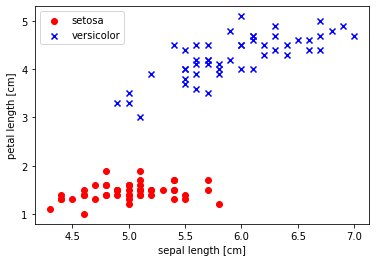

In [ ]:
#1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
#Iris-setosaを-1,Iris-versicolor1に変換・・・Iris-verginicaと間違えてる？
y = np.where(y == 'Iris-setosa', -1, 1)
#1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0,2]].values
#品種setosaのプロット(赤の○)
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
#品種versicolorのプロット(青の×)
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
#軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#凡例の設定(左上に配置)
plt.legend(loc='upper left')
#図の表示
plt.show

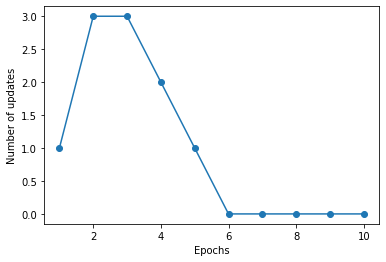

In [ ]:
ppn = Perceptron(eta=0.1,n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  #マーカーとカラーマップの準備
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
  #領域を塗りつぶすためのもの
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
  #グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

  #各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  #予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  #グリッドポイントの等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  #軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # クラスごとに訓練データをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

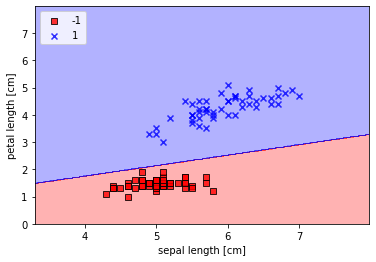

In [ ]:
#決定領域のプロット
plot_decision_regions(X,  y, classifier=ppn)
#軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#凡例の設定(左上に配置)
plt.legend(loc='upper left')
plt.show()